In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
plt.rc('axes', titlesize=25)
plt.rc('axes', labelsize=20)
plt.rc('legend', fontsize=20)
# plt.rc('xtick', labelsize=20)
# plt.rc('ytick', labelsize=20)
import matplotlib as mpl
mpl.rcParams['lines.linewidth'] = 2

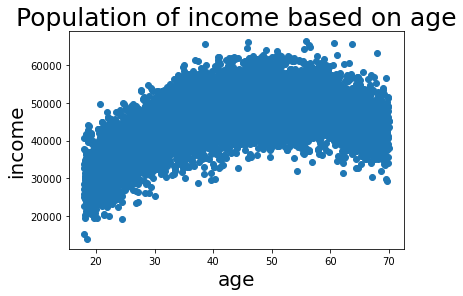

In [2]:
path_to_data = 'https://raw.githubusercontent.com/jeshan49/EEMP2019/master/content/part-5/part-5-1/income.csv'
df = pd.read_csv(path_to_data)


# Plot of population of income as a function of age
plt.clf()
plt.scatter(x=df['age'],y=df['income'])
plt.title('Population of income based on age')
plt.xlabel('age')
plt.ylabel('income')
plt.show();
# plt.savefig('../figures/fig4_1.png')

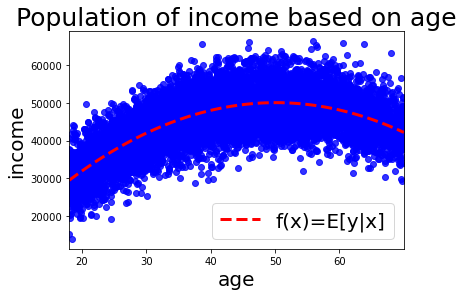

In [3]:
# Plot of population of income as a function of age
plt.clf()
sns.regplot(x='age', y='income', data=df, order=2, ci=None,
            scatter_kws={'color':'blue'},
            line_kws={'color':'red', 'ls':'--'}).set_title('Population of income based on age')
plt.legend(labels=['f(x)=E[y|x]'])
plt.show();
#plt.savefig('../figures/fig4_2.png')

<Figure size 432x288 with 0 Axes>

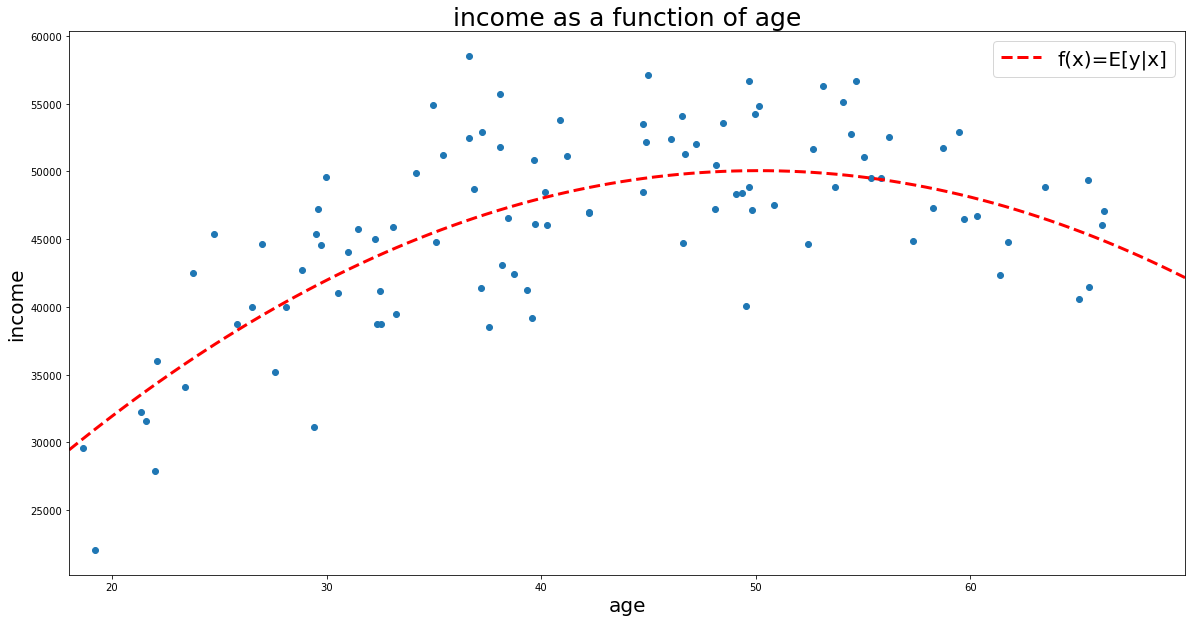

In [4]:
# Plot of sample of income as a function of age
plt.clf()
X, _, y, _ = train_test_split(df['age'], df['income'], test_size=0.99, random_state=181)
plt.figure(figsize=(20,10))
sns.regplot(x='age', y='income', data=df, order=2, ci=None, scatter=None, line_kws={'color':'red', 'ls':'--'}).set_title('income as a function of age')
plt.scatter(X, y)
plt.legend(labels=['f(x)=E[y|x]'])
plt.show();
#plt.savefig('../figures/fig4_3.png')

/home/jah/miniconda3/envs/eemp2020/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  


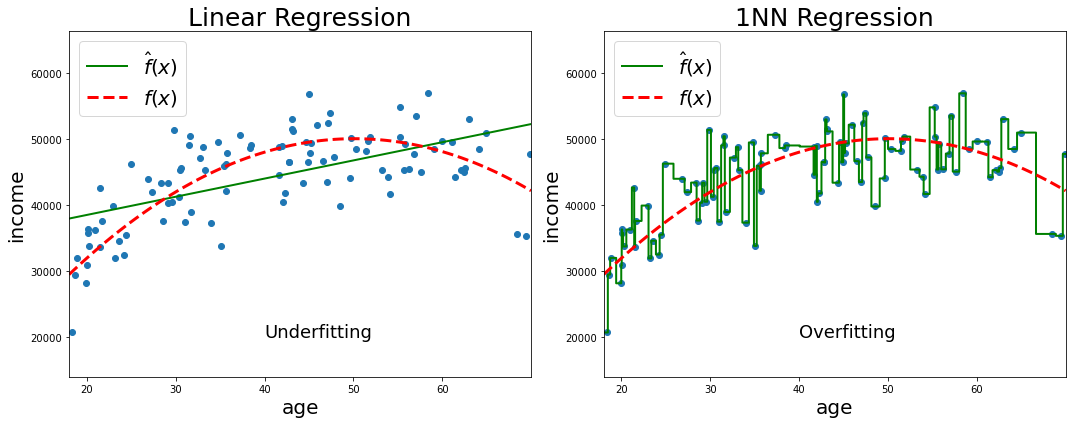

In [5]:
# Plot of linear reg and KNN on sample income data
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
reg = LinearRegression()
knn = KNeighborsRegressor(n_neighbors=1)
X, _, y, _ = train_test_split(df['age'], df['income'], test_size=0.99)
range_X = np.linspace(df['age'].min(), df['age'].max(), 1000)
X, y, range_X = X[:, np.newaxis], y[:, np.newaxis], \
                np.linspace(df['age'].min(), df['age'].max(), 1000)[:, np.newaxis]
y_hat_reg, y_hat_knn = reg.fit(X,y).predict(range_X), knn.fit(X,y).predict(range_X)
fig, axs = plt.subplots(1, 2, figsize=(15, 6), tight_layout=True)
title, fit = ['Linear Regression', '1NN Regression'], ['Underfitting', 'Overfitting']
axs[0].plot(range_X, y_hat_reg, c='g')
axs[1].step(range_X, y_hat_knn, c='g')
for i in range(len(axs)):
    axs[i].scatter(X,y)
    axs[i].set_title(title[i])
    axs[i].set_xlabel('X')
    axs[i].set_ylabel('y')
    sns.regplot(x='age', y='income', data=df, order=2, ci=None, scatter=None, ax=axs[i], line_kws={'color':'red', 'ls':'--'})
    axs[i].text(40, 20000, fit[i], fontsize=18)
    axs[i].legend(labels=['$\hat{f}(x)$', '$f(x)$'])
    axs[i].set_xlim(df['age'].min(), df['age'].max())
    axs[i].set_ylim(df['income'].min(), df['income'].max())
plt.savefig('../figures/fig4_4.png')

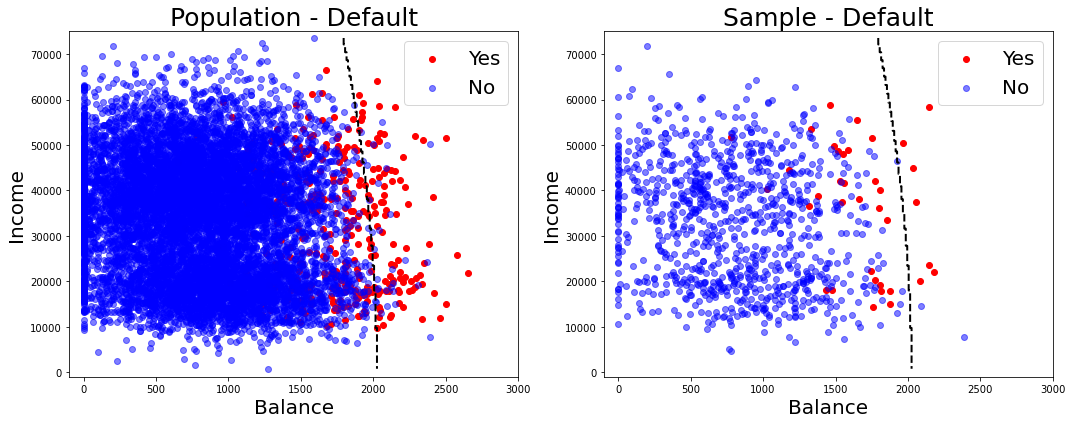

In [6]:
#1 + 2 xxx
# code that generates population and sample plots with optimal decision boundary
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
path_to_data = 'https://raw.githubusercontent.com/jeshan49/EEMP2019/master/content/part-5/part-5-1/Default.csv'
df = pd.read_csv(path_to_data, index_col=0)
df['default'] = pd.get_dummies(df['default'], drop_first=True)
X, test_X, y, test_y = train_test_split(df[['balance', 'income']], df['default'], test_size=0.9, random_state=181)
qda = QuadraticDiscriminantAnalysis().fit(test_X,test_y)
h = 10  # step size in the mesh
x_min, x_max = test_X['balance'].min() - 100, test_X['balance'].max() + 1
y_min, y_max = test_X['income'].min() - 1, test_X['income'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
YY = qda.predict(np.c_[xx.ravel(), yy.ravel()])
YY = YY.reshape(xx.shape)
fig, axs = plt.subplots(1, 2, figsize=(15, 6), tight_layout=True)
axs[0].scatter(df['balance'][df['default'] == 1], df['income'][df['default'] == 1], color='red', label = 'Yes')
axs[0].scatter(df['balance'][df['default'] == 0], df['income'][df['default'] == 0], color='blue', alpha=0.5, label = 'No')
axs[0].contour(xx, yy, YY, [0.5], colors='black', linestyles='dashed')
axs[0].set_title('Population - Default')
axs[1].scatter(X['balance'][y == 1],X['income'][y == 1], color='red', label = 'Yes')
axs[1].scatter(X['balance'][y == 0],X['income'][y == 0], color='blue', alpha=0.5, label = 'No')
axs[1].contour(xx, yy, YY, [0.5], colors='black', linestyles='dashed')
axs[1].set_title('Sample - Default')
for ax in axs:
    ax.legend()
    ax.set_ylabel('Income')
    ax.set_xlabel('Balance')
    ax.set_xlim(-100, 3000)
    ax.set_ylim(-1000, 75000)
plt.show()

/home/jah/miniconda3/envs/eemp2020/lib/python3.7/site-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
/home/jah/miniconda3/envs/eemp2020/lib/python3.7/site-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


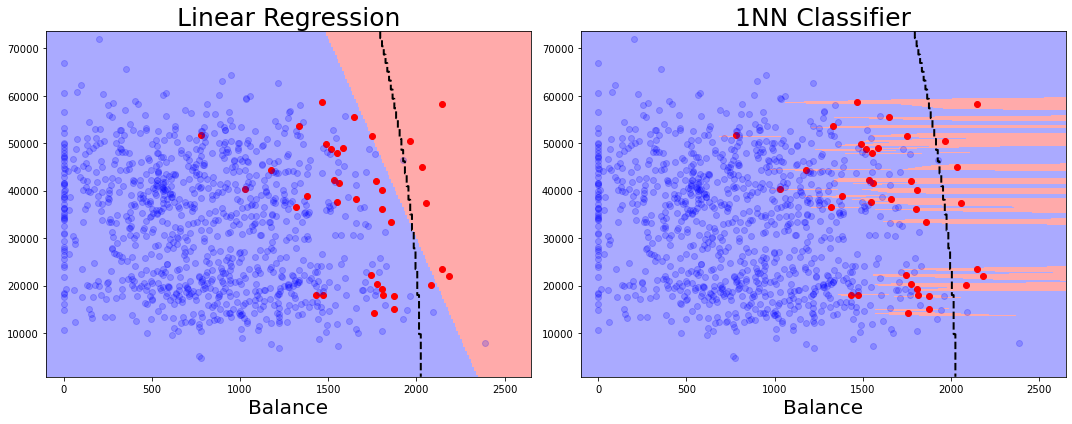

In [7]:
#3 
# Code that generates plots with Linear regression and KNN decision boundaries along with the optimal decision boundary
from matplotlib.colors import ListedColormap
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
lda = LinearDiscriminantAnalysis()
knn = KNeighborsClassifier(n_neighbors=1, n_jobs=-1)
lda.fit(X, y).predict(X)
knn.fit(X, y).predict(X)
cmap_light = ListedColormap(['#AAAAFF', '#FFAAAA'])
fig, axs = plt.subplots(1, 2, figsize=(15, 6), tight_layout=True)
clfs = [lda, knn]
clfs_names = ['Linear Regression', '1NN Classifier']
for i in range(len(clfs)):
    Z = clfs[i].predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    axs[i].pcolormesh(xx, yy, Z, cmap=(cmap_light))
    YY = qda.predict(np.c_[xx.ravel(), yy.ravel()])
    YY = YY.reshape(xx.shape)
    axs[i].set_title(clfs_names[i])
    axs[i].contour(xx, yy, YY, [0.5], colors='black', linestyles='dashed')
    axs[i].scatter(X['balance'][y == 1],X['income'][y == 1], color='red', label = 'Yes')
    axs[i].scatter(X['balance'][y == 0],X['income'][y == 0], color='blue', alpha=0.2, label = 'No')
    axs[i].set_xlabel('Balance')
    axs[i].set_xlabel('Balance')   

In [ ]:
#4 -> sigmoid.png

TypeError: 'AxesSubplot' object is not subscriptable

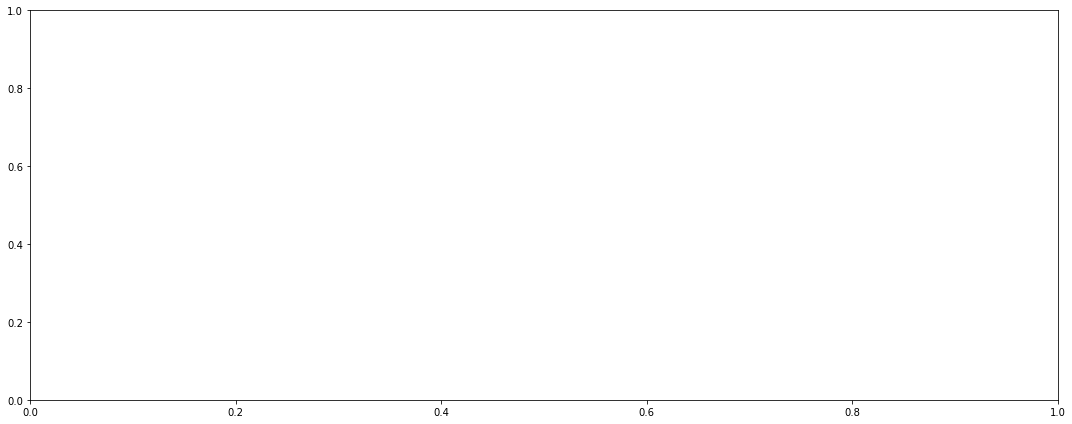

In [8]:
#5 # Code that generates plots with Linear regression and KNN decision boundaries along with the optimal decision boundary
from matplotlib.colors import ListedColormap
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(X, y).predict(X)
cmap_light = ListedColormap(['#AAAAFF', '#FFAAAA'])
fig, axs = plt.subplots(1, 1, figsize=(15, 6), tight_layout=True)
clfs = [log]
clfs_names = ['Logistic Regression']
for i in range(len(clfs)):
    Z = clfs[i].predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    axs[i].pcolormesh(xx, yy, Z, cmap=(cmap_light))
    YY = qda.predict(np.c_[xx.ravel(), yy.ravel()])
    YY = YY.reshape(xx.shape)
    axs[i].set_title(clfs_names[i])
    axs[i].contour(xx, yy, YY, [0.5], colors='black', linestyles='dashed')
    axs[i].scatter(X['balance'][y == 1],X['income'][y == 1], color='red', label = 'Yes')
    axs[i].scatter(X['balance'][y == 0],X['income'][y == 0], color='blue', alpha=0.2, label = 'No')
    axs[i].set_xlabel('Balance')
    axs[i].set_xlabel('Balance')

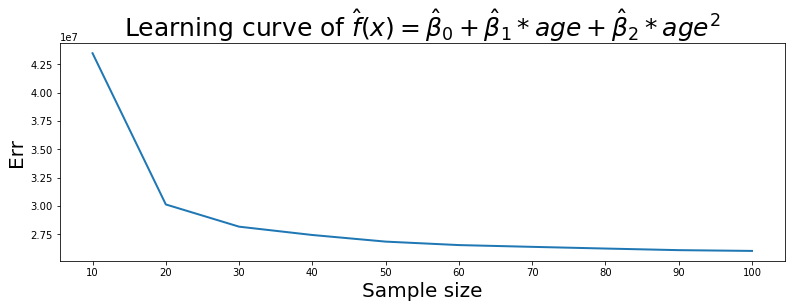

Err at sample size 100: 26028816


In [9]:
# 7
# Code that generates learning curve
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE

path_to_data = 'https://raw.githubusercontent.com/jeshan49/EEMP2019/master/content/part-5/part-5-1/income.csv'
df = pd.read_csv(path_to_data)
df['age_sq'] = df['age']**2

sample_fraction = np.linspace(0.001, 0.01, 10)
mses = []
for sample in sample_fraction:
    temp_mses = []
    for i in range(1000):
        X, _, y, _ = train_test_split(df[['age', 'age_sq']], df['income'], train_size=sample)
        reg = LinearRegression().fit(X,y)
        y_pred = reg.predict(df[['age', 'age_sq']])
        temp_mses.append(MSE(y_pred,df['income']))
    mses.append(np.mean(temp_mses))
    
plt.figure(figsize=(13,4))    
plt.plot(sample_fraction*len(df['income']), mses)
plt.xlabel('Sample size')
plt.xticks(sample_fraction*len(df['income']))
plt.ylabel('Err')
plt.title(r'Learning curve of $\hat{f}(x)=\hat{\beta}_0 + \hat{\beta}_1 * age + \hat{\beta}_2 * age^2$')
plt.show();
print('Err at sample size 100:', int(mses[-1]))

/home/jah/miniconda3/envs/eemp2020/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  import sys


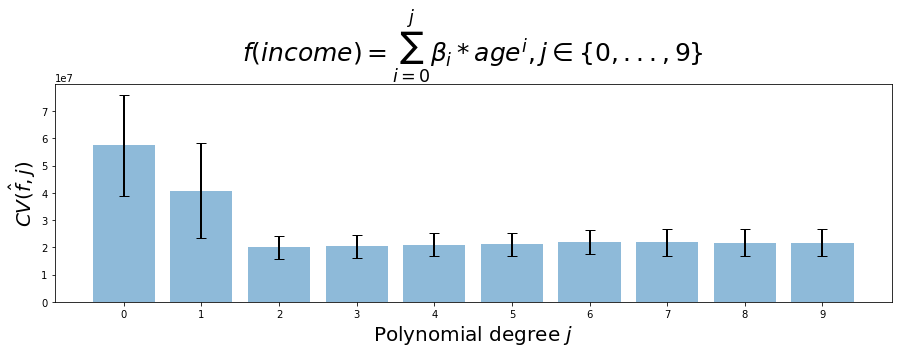

Best model: PolynomialFeatures()  
 Score: 19951369


In [10]:
#8
# Code that calculates and plots CV(f,a) for polynomial regressions
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

X, _, y, _ = train_test_split(df['age'][:,np.newaxis], df['income'], train_size=0.01, random_state=36)

def PolynomialRegression(degree=1, **kwargs):
    return make_pipeline(PolynomialFeatures(degree), LinearRegression(**kwargs))

param_grid = {'polynomialfeatures__degree': np.arange(10)}

poly_grid = GridSearchCV(PolynomialRegression(), param_grid, cv=5, scoring='neg_mean_squared_error')

poly_grid.fit(X,y)

list(poly_grid.best_estimator_)[0]

poly_grid.best_score_*-1

poly_grid.cv_results_['mean_test_score']

poly_grid.cv_results_['std_test_score']

plt.figure(figsize=(15,4))  
plt.bar(np.arange(10), poly_grid.cv_results_['mean_test_score']*-1, yerr=poly_grid.cv_results_['std_test_score'], alpha=0.5, capsize=5)
plt.xlabel('Polynomial degree $j$')
plt.xticks(np.arange(10))
plt.ylabel(r'$CV(\hat{f},j)$')
plt.yticks(np.arange(8)*1e7)
plt.title(r'$f(income)=\sum_{i=0}^{j}\beta_i *age^i, j\in\{0,...,9\}$')
plt.show();
print('Best model:', list(poly_grid.best_estimator_)[0],' \n Score:', int(poly_grid.best_score_*-1))

In [ ]:
#9 
# Code that plots decision tree regression with max depth = 2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

path_to_data = 'https://raw.githubusercontent.com/jeshan49/EEMP2019/master/content/part-5/part-5-1/income.csv'

df = pd.read_csv(path_to_data)

from sklearn.tree import DecisionTreeRegressor

regr = DecisionTreeRegressor(max_depth=2)
from sklearn.model_selection import train_test_split
X, _, y, _ = train_test_split(df['age'][:,np.newaxis], df['income'], train_size=0.01, random_state=181)

regr.fit(X,y)
thres = regr.tree_.threshold[regr.tree_.threshold>0]
y_pred = regr.predict(np.linspace(df['age'].min(), df['age'].max(), 1000)[:,np.newaxis])
plt.figure(figsize=(15,7))  
plt.scatter(X, y, alpha=0.5)
plt.step(np.linspace(df['age'].min(), df['age'].max(), 1000)[:,np.newaxis], y_pred, c="g", label=r'$\hat{f}$', linewidth=2)
sns.regplot(x='age', y='income', data=df, order=2, ci=None, scatter=None, line_kws={'color':'red', 'ls':'--'}, label=r'$f$')
plt.axvline(x=thres[0],ymin=0,ymax=1, color='black', label='Depth=1', linestyle='--')
plt.axvline(x=thres[1],ymin=0,ymax=1, color='grey', label='Depth=2', linestyle='--')
plt.axvline(x=thres[2],ymin=0,ymax=1, color='grey', linestyle='--')
plt.text(31, 55000, r'$R_3$', fontsize=17)
plt.text(25, 55000, r'$R_2$', fontsize=17)
plt.text(50, 55000, r'$R_4$', fontsize=17)
plt.text(18, 55000, r'$R_1$', fontsize=17)
plt.title('Decision Tree Regression (Max Depth = 2)')
plt.legend()
plt.show()

In [ ]:
#10
# Code that creates a figure of the tree of the regression
from sklearn import tree
# conda install -c conda-forge pydotplus
plt.figure(figsize=(20,10))
tree.plot_tree(regr.fit(X,y), feature_names=['age'], class_names='income');

In [ ]:
#11
# Code that the unrestricted decision tree regression
regr = DecisionTreeRegressor()
regr.fit(X,y)
thres = regr.tree_.threshold[regr.tree_.threshold>0]
y_pred = regr.predict(np.linspace(df['age'].min(), df['age'].max(), 1000)[:,np.newaxis])
plt.figure(figsize=(15,7)) 
plt.scatter(X, y, alpha=0.5)
plt.step(np.linspace(df['age'].min(), df['age'].max(), 1000)[:,np.newaxis], y_pred, c="g", label=r'$\hat{f}$', linewidth=2)
sns.regplot(x='age', y='income', data=df, order=2, ci=None, scatter=None, line_kws={'color':'red', 'ls':'--'}, label=r'$f$')
plt.title('Decision Tree Regression (Unrestricted)')
plt.legend()
plt.show()

In [ ]:
#12
# Code that generates Probability of majority heads and std of heads ratio
from scipy.stats import binom
x = np.arange(1,5001)
probs = []
for i in x:
    probs.append(binom(i,0.49).cdf(int(np.floor(i/2))))
probs = probs[::2]
x_ = x[::2]
heads_proba = 0.51
coin_tosses = (np.random.rand(5000, 1000) < heads_proba).astype(np.int32)
cumulative_heads_ratio = np.cumsum(coin_tosses, axis=0) / np.arange(1, 5001)[:,np.newaxis]

av = cumulative_heads_ratio.mean(axis=1)
sv = cumulative_heads_ratio.std(axis=1)

ss = av-sv
so = av+sv

fig, axs = plt.subplots(1, 2, figsize=(20, 5), tight_layout=True)
axs[0].plot(x_, probs)
axs[0].plot([0, 5000], [0.51, 0.51], "k--", linewidth=2, label="51%")
axs[1].set_ylabel('Heads ratio')
axs[0].set_ylabel('Prob of majority Heads')
axs[0].set_yticks(np.arange(0,101,5)/100)
axs[0].set_xticks(np.arange(0,5001,500))
axs[0].set_xlabel('# of coin tosses')
axs[1].set_xlabel('# of coin tosses')
axs[1].plot(np.arange(1,5001), ss, color='blue')
axs[1].plot(np.arange(1,5001), so, color='blue')
axs[1].plot([0, 5000], [0.51, 0.51], "k--", linewidth=2, label="51%")
plt.show();

In [ ]:
#13
# Code that plots voting reg, linear reg, knn reg, and dec tree as well as scatter plot along with f
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Styles for plots in the notebook
plt.rc('axes', titlesize=25)
plt.rc('axes', labelsize=20) 
plt.rc('legend', fontsize=20) 
plt.style.use('seaborn-white')
%matplotlib inline


path_to_data = 'https://raw.githubusercontent.com/jeshan49/EEMP2019/master/content/part-5/part-5-1/income.csv'

df = pd.read_csv(path_to_data)
## Resizing X:
X = df['age'][:, np.newaxis]
y = df['income']

from sklearn.model_selection import train_test_split
X, pop_X, y, pop_y = train_test_split(X, y, train_size=0.01, test_size=0.01, random_state=181)

from sklearn.ensemble import VotingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error as MSE

r1 = LinearRegression()
r2 = KNeighborsRegressor(n_neighbors=10)
r3 = DecisionTreeRegressor(max_depth=2)

votreg = VotingRegressor([('lr',r1),('knn',r2),('dtr',r3)])
votreg.fit(X,y)
y_pred = votreg.predict(np.linspace(df['age'].min(), df['age'].max(), 1000)[:, np.newaxis])

r1.fit(X,y)
y_pred_lin = r1.predict(np.linspace(df['age'].min(), df['age'].max(), 1000)[:, np.newaxis])

r2.fit(X,y)
y_pred_knn = r2.predict(np.linspace(df['age'].min(), df['age'].max(), 1000)[:, np.newaxis])

r3.fit(X,y)
y_pred_dtr = r3.predict(np.linspace(df['age'].min(), df['age'].max(), 1000)[:, np.newaxis])

plt.figure(figsize=(20,7))
plt.plot(np.linspace(df['age'].min(), df['age'].max(), 1000)[:, np.newaxis], y_pred, c='g', linewidth=5, label='Voting regression')
plt.plot(np.linspace(df['age'].min(), df['age'].max(), 1000)[:, np.newaxis], y_pred_lin, '--', c='cyan', linewidth=1, label='Linear regression')
plt.plot(np.linspace(df['age'].min(), df['age'].max(), 1000)[:, np.newaxis], y_pred_knn, '--', c='orange', linewidth=1, label='10NN regression')
plt.plot(np.linspace(df['age'].min(), df['age'].max(), 1000)[:, np.newaxis], y_pred_dtr, '--', c='black', linewidth=1, label='Decision tree (Max depth=2)')
plt.scatter(X, y)
sns.regplot(x='age', y='income', data=df, order=2, ci=None, scatter=None, line_kws={'color':'red', 'ls':'--'}, label=r'$f$').set_title('income as a function of age')
plt.text(31, 30000, r'Voting regression test MSE: {0:,.2f}'.format(MSE(pop_y,votreg.predict(pop_X))), fontsize=17)
plt.text(31, 28000, r'Linear regression test MSE: {0:,.2f}'.format(MSE(pop_y,r1.predict(pop_X))), fontsize=17)
plt.text(31, 26000, r'10NN regression test MSE: {0:,.2f}'.format(MSE(pop_y,r2.predict(pop_X))), fontsize=17)
plt.text(31, 24000, r'Decision tree regression test MSE: {0:,.2f}'.format(MSE(pop_y,r3.predict(pop_X))), fontsize=17)
plt.legend(loc='upper left')
plt.show()